In [23]:
!pip install pyod


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/IndianSummers.csv'
climate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
climate_data.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


In [21]:
# Checking for missing values in the dataset
missing_values = climate_data.isnull().sum()

# Converting 'Date' from string to datetime
climate_data['Date'] = pd.to_datetime(climate_data['Date'])

# Display missing values and data types
missing_values_summary = missing_values[missing_values > 0]
data_types = climate_data.dtypes

missing_values_summary, data_types


(Series([], dtype: int64),
 City                        object
 Date                datetime64[ns]
 tempmax                    float64
 tempmin                    float64
 temp                       float64
 feelslikemax               float64
 feelslikemin               float64
 feelslike                  float64
 dew                        float64
 humidity                   float64
 windspeed                  float64
 winddir                    float64
 sealevelpressure           float64
 cloudcover                 float64
 visibility                 float64
 sunrise                     object
 sunset                      object
 moonphase                  float64
 dtype: object)

In [22]:
# Dropping the 'sealevelpressure' column due to a high number of missing values
climate_data.drop(columns=['sealevelpressure'], inplace=True)

# Imputing missing values for other columns with their respective median values
climate_data.fillna(climate_data.median(), inplace=True)

# Re-checking for missing values
missing_values_after_imputation = climate_data.isnull().sum()

missing_values_after_imputation


<ipython-input-22-bb20cfcb9d2f>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  climate_data.fillna(climate_data.median(), inplace=True)
<ipython-input-22-bb20cfcb9d2f>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  climate_data.fillna(climate_data.median(), inplace=True)


City            0
Date            0
tempmax         0
tempmin         0
temp            0
feelslikemax    0
feelslikemin    0
feelslike       0
dew             0
humidity        0
windspeed       0
winddir         0
cloudcover      0
visibility      0
sunrise         0
sunset          0
moonphase       0
dtype: int64

In [20]:
# Selecting numerical features
selected_features = climate_data.select_dtypes(include=['float64', 'int64'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

scaled_features

array([[-0.6639698 , -2.12647909, -1.31978813, ..., -1.5062703 ,
        -1.1341755 ,  0.32222603],
       [-0.68830044, -3.06165843, -1.74328363, ..., -1.5062703 ,
        -0.84437111,  0.48446222],
       [-0.46932468, -3.49807546, -1.67813048, ..., -1.44945878,
        -0.84437111,  0.6466984 ],
       ...,
       [-1.19924389, -0.84840064, -1.41751786, ...,  1.31401606,
         0.67710195, -0.55384938],
       [-0.95593748, -0.84840064, -1.45009444, ...,  1.94300079,
         0.67710195, -0.3916132 ],
       [-0.93160684, -0.84840064, -1.12432866, ...,  1.12734963,
         0.67710195, -0.22937701]])

In [13]:
# Splitting the data into training and test sets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)


In [24]:
from pyod.models.knn import KNN  # for K-Nearest Neighbors
# Other imports (pandas, numpy, etc.) remain the same


In [28]:
# Assuming you have already preprocessed and split your data as before

# Initialize the KNN model
knn_model = KNN()

# Train the model
knn_model.fit(X_train)

# Get the prediction labels and outlier scores of the training data
y_train_pred = knn_model.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = knn_model.decision_scores_  # raw outlier scores

# Get the prediction on the test data
y_test_pred = knn_model.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = knn_model.decision_function(X_test)  # outlier scores

# Display the first few predictions and scores
print(y_test_pred[:10])
print(y_test_scores[:10])

[0 0 0 0 0 0 0 0 0 0]
[1.10268746 1.4937187  0.89591835 1.50471598 1.07366666 1.65832012
 1.3781174  1.15292546 1.48448443 1.65824458]


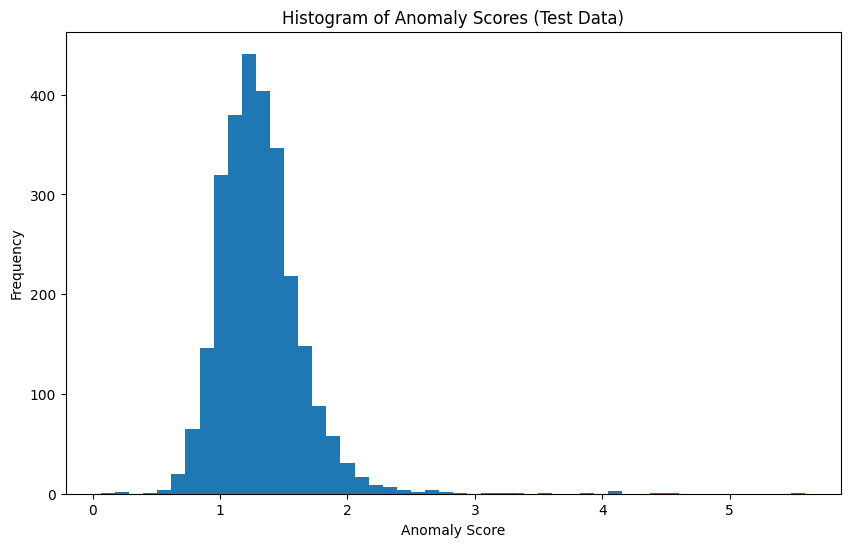

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of anomaly scores for the test data
plt.figure(figsize=(10, 6))
plt.hist(y_test_scores, bins=50)
plt.title("Histogram of Anomaly Scores (Test Data)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


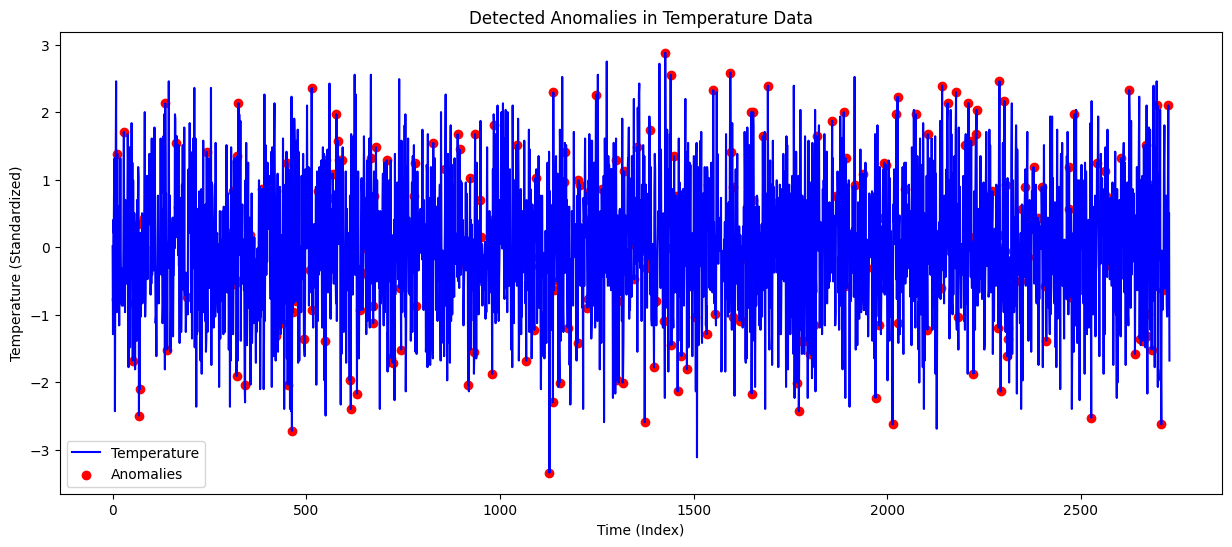

In [32]:
# Assuming 'temp' is one of the features and its index is known
temp_index = list(selected_features.columns).index('temp')
temp_test_data = X_test[:, temp_index]

# Identifying indexes of the anomalies
anomalies_index = np.where(y_test_pred == 1)[0]  # 1 indicates anomalies

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(temp_test_data, label="Temperature", color='blue')
plt.scatter(anomalies_index, temp_test_data[anomalies_index], color='red', label='Anomalies')
plt.title("Detected Anomalies in Temperature Data")
plt.xlabel("Time (Index)")
plt.ylabel("Temperature (Standardized)")
plt.legend()
plt.show()
